# 8.2.1 Estimación de la Covarianza Empírica 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EmpiricalCovariance

import warnings
warnings.filterwarnings("ignore")

Link: https://youtu.be/xN2B9aSBDik?si=XuMmEwtih-vy7ZuC

La función EmpiricalCovariance() realiza el estimador de máxima verosimilitud de la matriz de covarianzas de los datos, suponiendo que hay una cantidad suficientemente grande de patrones respecto a la cantidad de características. Este estimador se ve fuertemente afectado por la presencia de outliers en los datos.



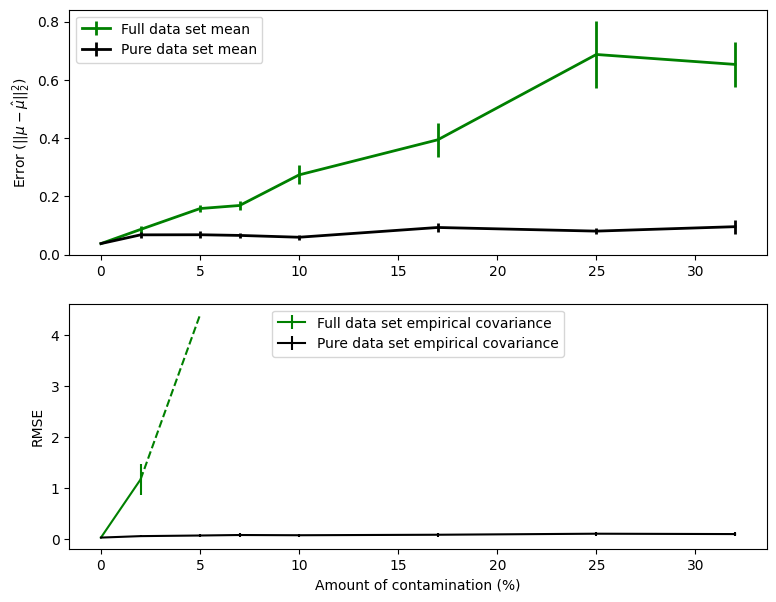

In [3]:
n_samples = 80
n_features = 5
repeat = 20

range_n_outliers = np.array([0, 2, 5, 7, 10, 17, 25, 32]).astype(int)

# definition of arrays to store results

err_loc_emp_full = np.zeros((range_n_outliers.size, repeat))
err_cov_emp_full = np.zeros((range_n_outliers.size, repeat))
err_loc_emp_pure = np.zeros((range_n_outliers.size, repeat))
err_cov_emp_pure = np.zeros((range_n_outliers.size, repeat))

# computation
for i, n_outliers in enumerate(range_n_outliers):
    for j in range(repeat):

        rng = np.random.RandomState(i * j)

        #
        # Muestra aleatoria de datos con media cero y varianza
        # unitaria. Es decir, cada patrón proviene de una
        # distribución normal multivariada con media cero y
        # matriz de covarianzas igual a la matriz identidad
        #
        X = rng.randn(n_samples, n_features)

        #
        # Selecciona 'n_outliers' puntos de la muestra
        # aleatoria de datos
        #
        outliers_index = rng.permutation(n_samples)[:n_outliers]

        #
        # Genera una matriz de +/- 5 para contaminar la
        # muestra de datos original
        #
        outliers_offset = 10.0 * (
            np.random.randint(2, size=(n_outliers, n_features)) - 0.5
        )
        X[outliers_index] += outliers_offset

        #
        # Marca cada patrón de la muestra de datos como inlier/outlier
        #
        inliers_mask = np.ones(n_samples).astype(bool)
        inliers_mask[outliers_index] = False

        #
        # Error cuadrático al estimar la media. La muestra
        # de datos tiene media cero. Este error es computado sobre
        # todos los datos (inliers + outliers)
        #
        err_loc_emp_full[i, j] = np.sum(X.mean(0) ** 2)

        #
        # Se computa el MSE entre la matriz estimada sobre la totalidad
        # de los datos (inliers + outliers) y la matriz identidad.
        #
        estimator = EmpiricalCovariance(
            # ---------------------------------------------
            # If True, data are not centered before computation.
            assume_centered=False,
        )

        #
        # El objeto cuenta con los siguientes atributos
        #   location_
        #   covariance_
        #   precision_ : estimated pseudo-inverse matrix
        #

        err_cov_emp_full[i, j] = estimator.fit(X).error_norm(np.eye(n_features))

        #
        # Se computa la media y la matriz de covarianzas usando
        # unicamente los inliers
        #
        pure_X = X[inliers_mask]
        pure_location = pure_X.mean(0)
        pure_emp_cov = EmpiricalCovariance().fit(pure_X)

        #
        # Errores sobre los inliers
        #
        err_loc_emp_pure[i, j] = np.sum(pure_location ** 2)
        err_cov_emp_pure[i, j] = pure_emp_cov.error_norm(np.eye(n_features))


plt.figure(figsize=(9, 7))
plt.subplot(2, 1, 1)
plt.errorbar(
    range_n_outliers,
    err_loc_emp_full.mean(1),
    yerr=err_loc_emp_full.std(1) / np.sqrt(repeat),
    label="Full data set mean",
    lw=2,
    color="green",
)
plt.errorbar(
    range_n_outliers,
    err_loc_emp_pure.mean(1),
    yerr=err_loc_emp_pure.std(1) / np.sqrt(repeat),
    label="Pure data set mean",
    lw=2,
    color="black",
)

plt.ylabel(r"Error ($||\mu - \hat{\mu}||_2^2$)")
plt.legend(loc="upper left")

plt.subplot(2, 1, 2)
x_size = range_n_outliers.size

plt.errorbar(
    range_n_outliers[: (x_size // 5 + 1)],
    err_cov_emp_full.mean(1)[: (x_size // 5 + 1)],
    yerr=err_cov_emp_full.std(1)[: (x_size // 5 + 1)],
    label="Full data set empirical covariance",
    color="green",
)
plt.plot(
    range_n_outliers[(x_size // 5) : (x_size // 2 - 1)],
    err_cov_emp_full.mean(1)[(x_size // 5) : (x_size // 2 - 1)],
    color="green",
    ls="--",
)
plt.errorbar(
    range_n_outliers,
    err_cov_emp_pure.mean(1),
    yerr=err_cov_emp_pure.std(1),
    label="Pure data set empirical covariance",
    color="black",
)

plt.xlabel("Amount of contamination (%)")
plt.ylabel("RMSE")
plt.legend(loc="upper center")

plt.show()

In [4]:
print('ok_')

ok_
